In [79]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [80]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\gpfla\\Desktop\\개발 공부자료\\GITHUB\\TodayWhatILearned\\Bigdata\\개념'

In [81]:
# 데이터 불러오기
corolla = pd.read_csv("./data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [82]:
# 데이터 수와 변수의 수 확인하기
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


## 범주형 변수를 이진형 변수로 변환

In [83]:
## 가변수 생성
corolla.Fuel_Type.unique()
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [84]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [86]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

## 불필요한 변수 제거 및 가변수 추가


In [87]:
Fuel = pd.DataFrame({"Petrol" : dummy_p, "Diesel" : dummy_d, "CNG" : dummy_c})

In [88]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [89]:
corolla_ = corolla.drop(["Id", "Model", "Fuel_Type"], axis = 1, inplace = False)
mlr_data = pd.concat((corolla_, Fuel), 1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [90]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

C:\Users\gpfla\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [91]:
feature_columns = list(mlr_data.columns.difference(['Price']))
X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [92]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [93]:
 ## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     312.2
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:37:39   Log-Likelihood:                -8443.3
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     971   BIC:                         1.712e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -213.1101    134.592     -1.583      0.114    -477.235      51.015
Age_08_04         -116.1003      4.049    -28.673      0.000    -124.046    -108.154
Airbag_1           151.5283    258.668      0.586      0.558    -356.084     659.141
Airbag_2          -182.2000    136.756     -1.332      0.183    -450.572      86.172
Airco              284.8550     94.959      3.000      0.003      98.507     471.203
Automatic          363.6226    157.518      2.308      0.021      54.507     672.738
Automatic_airco   2483.0493    196.570     12.632      0.000    2097.298    2868.801
BOVAG_Guarantee    559.3818    132.084      4.235      0.000     300.179     818.585
Backseat_Divider  -180.7421    136.612     -1.323      0.186    -448.831      87.347
Boardcomputer     -236.1771    124.532     -1.897      0.058    -480.561       8.206
CD_Player          206.4421    105.584      1.955      0.051      -0.758     413.642
CNG              -1929.6721    249.301     -7.740      0.000   -2418.902   -1440.442
Central_Lock      -128.4789    150.222     -0.855      0.393    -423.276     166.318
Cylinders           -0.0260      0.002    -10.870      0.000      -0.031      -0.021
Diesel            1705.6908    306.847      5.559      0.000    1103.532    2307.850
Doors              113.3462     42.476      2.669      0.008      29.992     196.701
Gears             -162.4902    204.469     -0.795      0.427    -563.743     238.762
Guarantee_Period    72.3845     14.017      5.164      0.000      44.878      99.891
HP                  52.0197      5.800      8.969      0.000      40.638      63.402
KM                  -0.0170      0.001    -12.545      0.000      -0.020      -0.014
Met_Color           12.0324     78.617      0.153      0.878    -142.245     166.310
Metallic_Rim       144.3385    100.720      1.433      0.152     -53.315     341.992
Mfg_Month          -92.2137     10.721     -8.601      0.000    -113.252     -71.175
Mfg_Year             4.3294      0.885      4.893      0.000       2.593       6.066
Mfr_Guarantee      135.5379     77.628      1.746      0.081     -16.800     287.876
Mistlamps           71.9664    114.750      0.627      0.531    -153.220     297.153
Petrol             223.9748    235.698      0.950      0.342    -238.561     686.510
Power_Steering     -68.0887    286.460     -0.238      0.812    -630.241     494.063
Powered_Windows    402.8810    150.475      2.677      0.008     107.587     698.175
Quarterly_Tax       15.8495      1.900      8.342      0.000      12.121      19.578
Radio              429.1775    652.684      0.658      0.511    -851.656    1710.011
Radio_cassette    -519.4861    653.161     -0.795      0.427   -1801.255     762.283
Sport_Model        347.3518     91.858      3.781      0.000     167.089     527.615
Tow_Bar           -123.

## VIF를 통한 다중공선성 확인 

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif
#inf는 지우기에는 애매함, 라디오와 카세트가 지우기 적절함

C:\Users\gpfla\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\gpfla\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


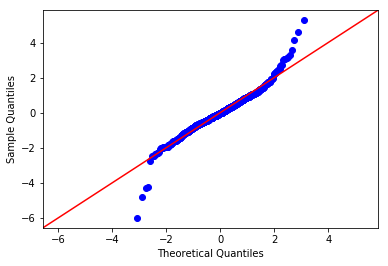

In [95]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0,0.5,'Residual')

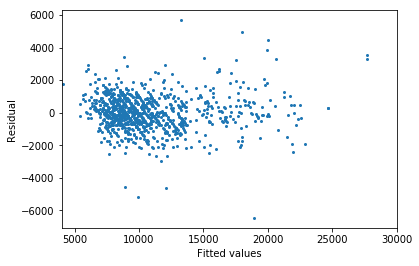

In [96]:
# residual pattern 확인
pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [97]:
 ## 검증 데이터에 대한 예측 
pred_y2 = fitted_full_model.predict(test_x)

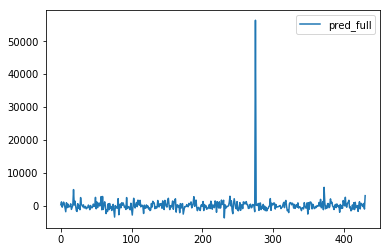

In [98]:
## 잔차 plot
plt.plot(np.array(test_y - pred_y2),label="pred_full")
plt.legend()
plt.show()

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
## MSE 성능
mean_squared_error(y_true = test_y, y_pred = pred_y2)

8546786.053902764

# 변수선택법

In [101]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001147FBD64E0>, 'AIC': 19063.564871891194}


In [102]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

{'AIC': 16954.57060425621,
 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1147f8afcf8>}

In [105]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    # 각 변수조합을 고려한 경우의 수
    for combo in itertools.combinations(X.columns.difference(['const']), k):
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 1.356372356414795 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17542.8
Name: 211, dtype: object


C:\Users\gpfla\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


In [109]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [110]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

C:\Users\gpfla\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


Processed  36 models on 1 predictors in 0.10372114181518555 seconds.
Processed  630 models on 2 predictors in 1.3663511276245117 seconds.
Processed  7140 models on 3 predictors in 17.324690341949463 seconds.
Total elapsed time: 19.0510733127594 seconds.


In [111]:
models

,AIC,model
1,17826.185118,<statsmodels.regression.linear_model.Regressio...
2,17542.795590,<statsmodels.regression.linear_model.Regressio...
3,17410.238757,<statsmodels.regression.linear_model.Regressio...


In [112]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1985.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:39:26   Log-Likelihood:                -8701.1
No. Observations:                1005   AIC:                         1.741e+04
Df Residuals:                    1001   BIC:                         1.743e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Automatic_airco  3909.1866    207.785     18.814      0.000    3501.442    4316.932
KM                 -0.0164      0.001    -11.975      0.000      -0.019      -0.014
Mfg_Year         1645.4286     35.222     46.716      0.000    1576.312    1714.545
const           -3.279e+06   7.05e+04    -46.525      0.000   -3.42e+06   -3.14e+06
==============================================================================
Omnibus:                      162.048   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1085.838
Skew:                           0.545   Prob(JB):                    1.63e-236
Kurtosis:                       7.974   Cond. No.                     1.25e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91387
full model AIC:  16954.57060
full model MSE:  13491632.75956
selected model Rsquared:  0.85612
selected model AIC:  17410.23876
selected model MSE:  13491632.75956


C:\Users\gpfla\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  if sys.path[0] == '':
C:\Users\gpfla\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
C:\Users\gpfla\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the futu

Text(0,0.5,'BIC')

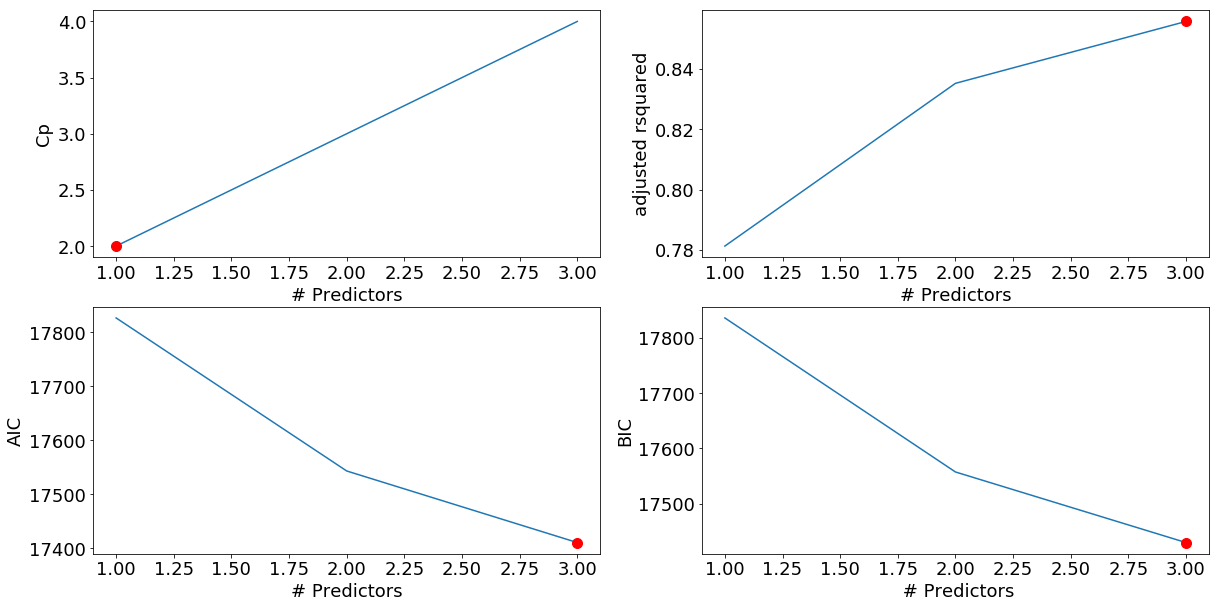

In [114]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [115]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [116]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [117]:
Forward_best_model = forward_model(X=train_x, y= train_y)

C:\Users\gpfla\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


Processed  36 models on 1 predictors in 0.09075212478637695
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000114272F1C18>
Processed  35 models on 2 predictors in 0.06981205940246582
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000114272F1588>
Processed  34 models on 3 predictors in 0.08976054191589355
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001140050C0F0>
Processed  33 models on 4 predictors in 0.08178377151489258
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001147F77F5F8>
Processed  32 models on 5 predictors in 0.06981205940246582
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM'

In [118]:
Forward_best_model.aic

16941.365748397613

In [119]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     431.0
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:39:38   Log-Likelihood:                -8445.7
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     980   BIC:                         1.706e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1104.7771    127.982      8.632      0.000     853.628    1355.926
Automatic_airco   2567.0518    181.173     14.169      0.000    2211.519    2922.584
KM                  -0.0172      0.001    -12.795      0.000      -0.020      -0.015
Weight               8.0190      1.224      6.549      0.000       5.616      10.422
HP                  51.4402      5.547      9.273      0.000      40.554      62.326
Quarterly_Tax       15.1496      1.802      8.409      0.000      11.614      18.685
Petrol           -1555.3055    467.763     -3.325      0.001   -2473.237    -637.374
Guarantee_Period    76.1900     13.360      5.703      0.000      49.973     102.407
Powered_Windows    319.6633     88.435      3.615      0.000     146.120     493.206
BOVAG_Guarantee    521.1243    126.254      4.128      0.000     273.365     768.884
cc                  -3.9006      0.543     -7.190      0.000      -4.965      -2.836
CNG              -3597.5694    492.666     -7.302      0.000   -4564.371   -2630.768
Airco              283.4385     92.107      3.077      0.002     102.688     464.189
Sport_Model        305.6567     86.055      3.552      0.000     136.783     474.530
Airbag_2          -210.0781    126.267     -1.664      0.096    -457.864      37.707
Doors              123.7313     41.484      2.983      0.003      42.324     205.138
Automatic          381.6245    156.113      2.445      0.015      75.270     687.979
CD_Player          227.9897    102.112      2.233      0.026      27.607     428.373
Age_08_04          -23.6372     10.759     -2.197      0.028     -44.750      -2.525
Boardcomputer     -245.0229    122.196     -2.005      0.045    -484.819      -5.227
Tow_Bar           -130.1259     81.349     -1.600      0.110    -289.765      29.513
Mfr_Guarantee      127.2307     76.267      1.668      0.096     -22.435     276.897
ABS               -192.7863    131.054     -1.471      0.142    -449.966      64.393
Metallic_Rim       137.3437     93.940      1.462      0.144     -47.002     321.690
const            -2.205e+06   2.56e+05     -8.600      0.000   -2.71e+06    -1.7e+06
==============================================================================
Omnibus:                       92.130   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.121
Skew:                           0.057   Prob(JB):                    7.10e-124
Kurtosis:                       6.678   Cond. No.                     5.81e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+08. This might indicate that there are
strong multicollinearity or other numerical pr

# 후진소거법

In [120]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [121]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [122]:
Backward_best_model = backward_model(X=train_x,y=train_y)

C:\Users\gpfla\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  # Remove the CWD from sys.path while we load stuff.


Processed  36 models on 35 predictors in 0.17752361297607422
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000114001C8748>
Processed  35 models on 34 predictors in 0.1655569076538086
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Mon

In [123]:
Backward_best_model.aic

16941.365748397628

# 단계적 선택법

In [124]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [125]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

C:\Users\gpfla\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  
C:\Users\gpfla\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  # Remove the CWD from sys.path while we load stuff.


Processed  36 models on 1 predictors in 0.10372209548950195
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001147F95A518>
forward
Processed  1 models on 0 predictors in 0.00598454475402832
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001147F95A8D0>
Processed  35 models on 2 predictors in 0.08776497840881348
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001147F95ADD8>
forward
Processed  2 models on 1 predictors in 0.005984306335449219
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001147E79A160>
Processed  34 models on 3 predictors in 0.09574365615844727
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.Reg

Processed  15 models on 14 predictors in 0.05485343933105469
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'cc', 'CNG', 'Airco', 'Sport_Model', 'Airbag_2', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001147FBD6400>
Processed  21 models on 16 predictors in 0.059841156005859375
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'cc', 'CNG', 'Airco', 'Sport_Model', 'Airbag_2', 'Doors', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000011400197550>
forward
Processed  16 models on 15 predictors in 0.06283235549926758
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'cc', 'CNG', 'Air

Processed  12 models on 25 predictors in 0.05086517333984375
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'cc', 'CNG', 'Airco', 'Sport_Model', 'Airbag_2', 'Doors', 'Automatic', 'CD_Player', 'Age_08_04', 'Boardcomputer', 'Tow_Bar', 'Mfr_Guarantee', 'ABS', 'Metallic_Rim', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001147FB2BD68>
forward
Processed  25 models on 24 predictors in 0.1156919002532959
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'cc', 'CNG', 'Airco', 'Sport_Model', 'Airbag_2', 'Doors', 'Automatic', 'CD_Player', 'Age_08_04', 'Boardcomputer', 'Tow_Bar', 'Mfr_Guarantee', 'ABS', 'Metallic_Rim', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001140019

Processed  25 models on 24 predictors in 0.12466573715209961
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'cc', 'CNG', 'Airco', 'Sport_Model', 'Airbag_2', 'Doors', 'Automatic', 'CD_Player', 'Age_08_04', 'Boardcomputer', 'Tow_Bar', 'Mfr_Guarantee', 'ABS', 'Metallic_Rim', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001147FAFE748>
backward
Processed  12 models on 25 predictors in 0.060829877853393555
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'cc', 'CNG', 'Airco', 'Sport_Model', 'Airbag_2', 'Doors', 'Automatic', 'CD_Player', 'Age_08_04', 'Boardcomputer', 'Tow_Bar', 'Mfr_Guarantee', 'ABS', 'Metallic_Rim', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001147

In [126]:
Stepwise_best_model.aic

16941.365748397613

# 성능평가 

In [127]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(25,) (26,) (25,)


In [128]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [129]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [130]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [131]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   8.54679e+06  8.53624e+06  8.53624e+06  8.53624e+06
RMSE      2923.49      2921.68      2921.68      2921.68
MAE       943.376      941.888      941.888      941.888
MAPE      8.77307      8.76028      8.76028      8.76028


In [132]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
25
26
25
